<a href="https://colab.research.google.com/github/IagoGarciaSuarez/MachineLearningTechniques/blob/main/ML_Task_3_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Getting Ready

In [1]:
!rm *.csv
!wget https://raw.githubusercontent.com/IagoGarciaSuarez/MachineLearningTechniques/main/ins_10best_results.csv

--2022-01-22 17:30:31--  https://raw.githubusercontent.com/IagoGarciaSuarez/MachineLearningTechniques/main/ins_10best_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2857144 (2.7M) [text/plain]
Saving to: ‘ins_10best_results.csv’

ins_10best_results. 100%[===================>]   2.72M  --.-KB/s    in 0.03s   

2022-01-22 17:30:31 (91.2 MB/s) - ‘ins_10best_results.csv’ saved [2857144/2857144]



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from matplotlib.pyplot import figure

In [3]:
insurance_df = pd.read_csv("ins_10best_results.csv")
ins_kbest = insurance_df.drop(['Unnamed: 0', 'UltimateIncurredClaimCost'], axis=1)

# 2. Boosting

In [4]:
rng = np.random.RandomState(1)
X_train, X_test, y_train, y_test = train_test_split(ins_kbest, insurance_df['UltimateIncurredClaimCost'], test_size=0.33, random_state=rng)
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [5]:
regressors = []
regressors.append(DecisionTreeRegressor(max_depth=55, criterion='mae'))
regressors.append(AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=55, criterion='mae'),
    n_estimators=100, random_state=rng))
regressors.append(GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                   max_depth=55, random_state=0, loss='ls'))

After training and testing each regressor, the results indicate that AdaBoostRegressor is the most acurate with a MAE value of 7238, while the Decision Tree and the Gradient Boost regressor models have both a MAE value around 10500.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


Error Measure 10507.989932190763


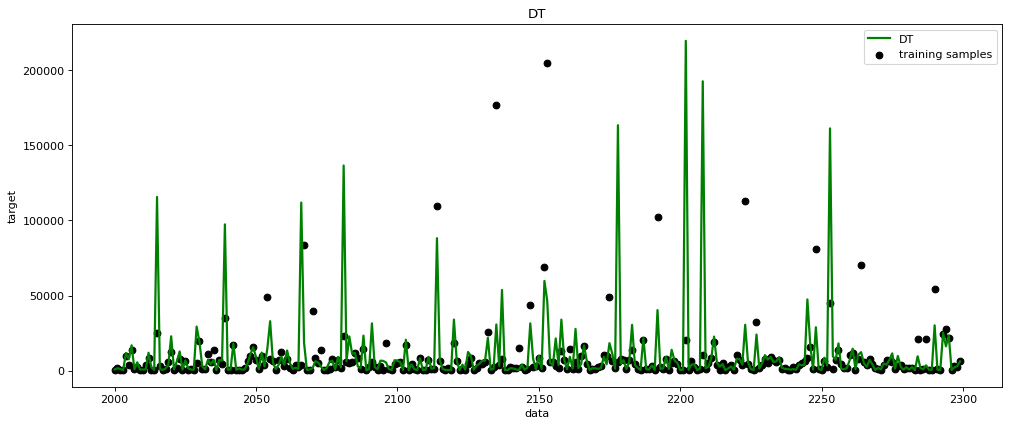

Error Measure 7238.804990286104


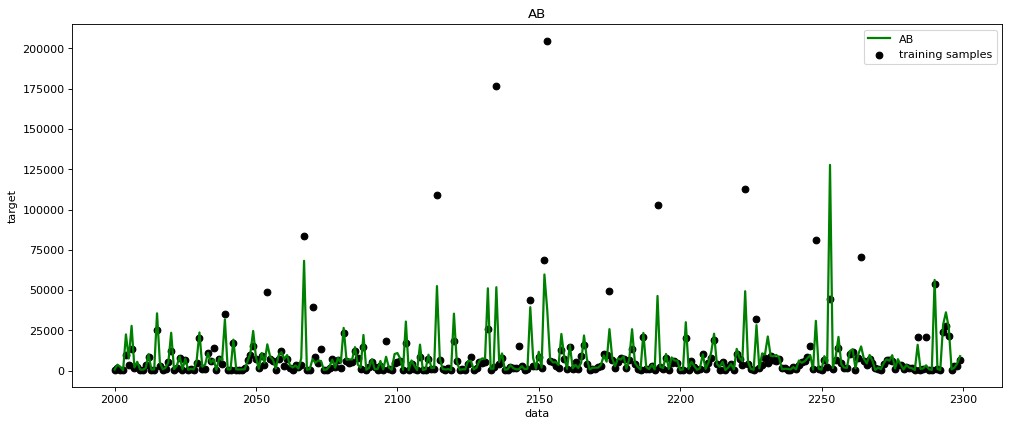

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


Error Measure 10495.62183560296


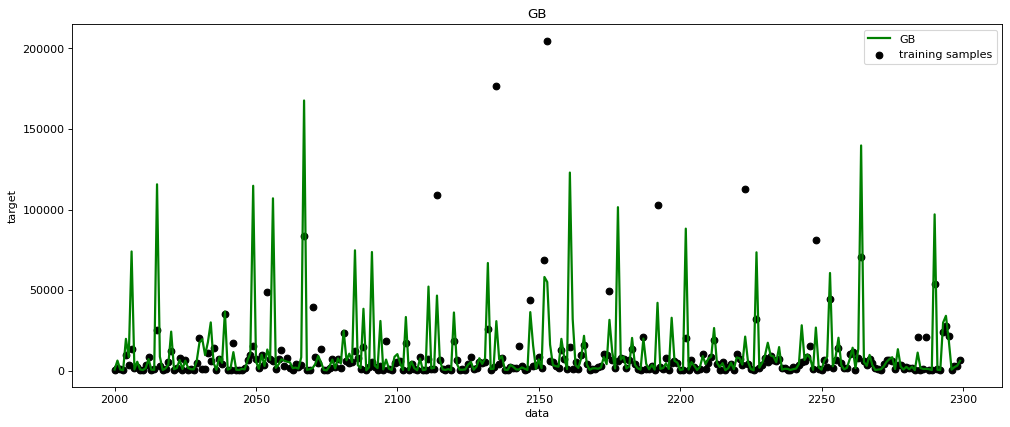

In [6]:
xx = np.stack(i for i in range(2000, 2300))
regr_names = ["DT", "AB", "GB"]
               
for i, r in enumerate(regressors):
    r.fit(X_train, y_train)
    y = r.predict(X_test)
    print("Error Measure", mean_absolute_error(y_test,y))
    figure(figsize=(15, 6), dpi=80)
    plt.scatter(xx, y_test[2000:2300], c="k", label="training samples")
    plt.plot(xx, y[2000:2300], c="g", label=regr_names[i], linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title(regr_names[i])
    plt.axis('tight')
    plt.legend()
    plt.show()